In [4]:
import pandas_datareader as pdr
import pandas as pd

# List of FRED series IDs
series_ids = ['GDPC1', 'CPIAUCSL', 'UNRATE', 'FEDFUNDS', 'CIVPART', 'INDPRO', 'TOTALSA', 'DSPIC96', 'PCE', 'DGS10']

# Add CPI to the list of series
series_ids.append('CPALTT01USM657N')

# Set start and end dates
start_date = '2010-01-01'
end_date = '2022-12-31'

# Use pandas datareader to pull data from FRED
fred_data = pdr.DataReader(series_ids, 'fred', start_date, end_date)

# Resample the data to a monthly frequency
fred_data = fred_data.resample('M').last()

# Print the first 5 rows of the data
print(fred_data.head())



                GDPC1  CPIAUCSL  UNRATE  FEDFUNDS  CIVPART   INDPRO  TOTALSA  \
DATE                                                                           
2010-01-31  15456.059   217.488     9.8      0.11     64.8  89.1936   10.893   
2010-02-28        NaN   217.281     9.8      0.13     64.9  89.5089   10.315   
2010-03-31        NaN   217.353     9.9      0.16     64.9  90.1449   11.772   
2010-04-30  15605.628   217.403     9.9      0.20     65.2  90.4740   11.454   
2010-05-31        NaN   217.290     9.6      0.20     64.9  91.7131   12.030   

            DSPIC96      PCE  DGS10  CPALTT01USM657N  
DATE                                                  
2010-01-31  11644.6  10056.1   3.63         0.341747  
2010-02-28  11655.6  10093.4   3.61         0.024921  
2010-03-31  11702.1  10156.0   3.84         0.410628  
2010-04-30  11799.8  10182.3   3.69         0.173688  
2010-05-31  11887.9  10210.8   3.31         0.077520  


In [5]:
import pandas as pd

# Save DataFrame to CSV file with index column
fred_data.to_csv('data/fred_data_with_index.csv', index=True)


In [3]:
fred_data = fred_data.rename(columns={'GDPC1': 'Real_GDP',
                                      'CPIAUCSL': 'CPI',
                                      'UNRATE': 'Unemployment_Rate',
                                      'FEDFUNDS': 'Federal_Funds_Rate',
                                      'CIVPART': 'Labor_Force_Participation_Rate',
                                      'INDPRO': 'Industrial_Production',
                                      'TOTALSA': 'Vehicle_Sales',
                                      'DSPIC96': 'Disposable_Income',
                                      'PCE': 'Personal_Consumption_Expenditures',
                                      'DGS10': '10Y_Treasury_Rate'})


In [4]:
fred_data['Real_GDP'] = fred_data['Real_GDP'].interpolate(method='linear')

In [5]:
fred_data.describe()

,Real_GDP,CPI,Unemployment_Rate,Federal_Funds_Rate,Labor_Force_Participation_Rate,Industrial_Production,Vehicle_Sales,Disposable_Income,Personal_Consumption_Expenditures,10Y_Treasury_Rate,CPALTT01USM657N
count,156.000000,156.00000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,17738.528103,245.65891,6.101282,0.636282,62.969231,99.191304,15.799641,13763.748718,13006.534615,2.233718,0.204669
std,1378.396125,19.73242,2.250935,0.857579,0.876401,3.887381,2.168984,1424.506647,2043.835529,0.735447,0.351166
min,15456.059000,217.19900,3.500000,0.050000,60.100000,84.959000,8.923000,11644.600000,10056.100000,0.550000,-0.668694
25%,16462.492250,232.18475,4.100000,0.090000,62.600000,97.445975,14.086500,12431.400000,11278.800000,1.735000,-0.036303
50%,17671.535000,240.16150,5.450000,0.160000,62.900000,99.816350,16.693500,13557.150000,12663.050000,2.220000,0.172766
75%,18867.477417,256.06725,7.900000,1.067500,63.400000,102.166850,17.629750,14980.000000,14284.975000,2.722500,0.426684
max,20187.495000,298.99000,14.700000,4.100000,65.200000,104.592700,18.655000,19213.900000,17788.600000,4.100000,1.373608


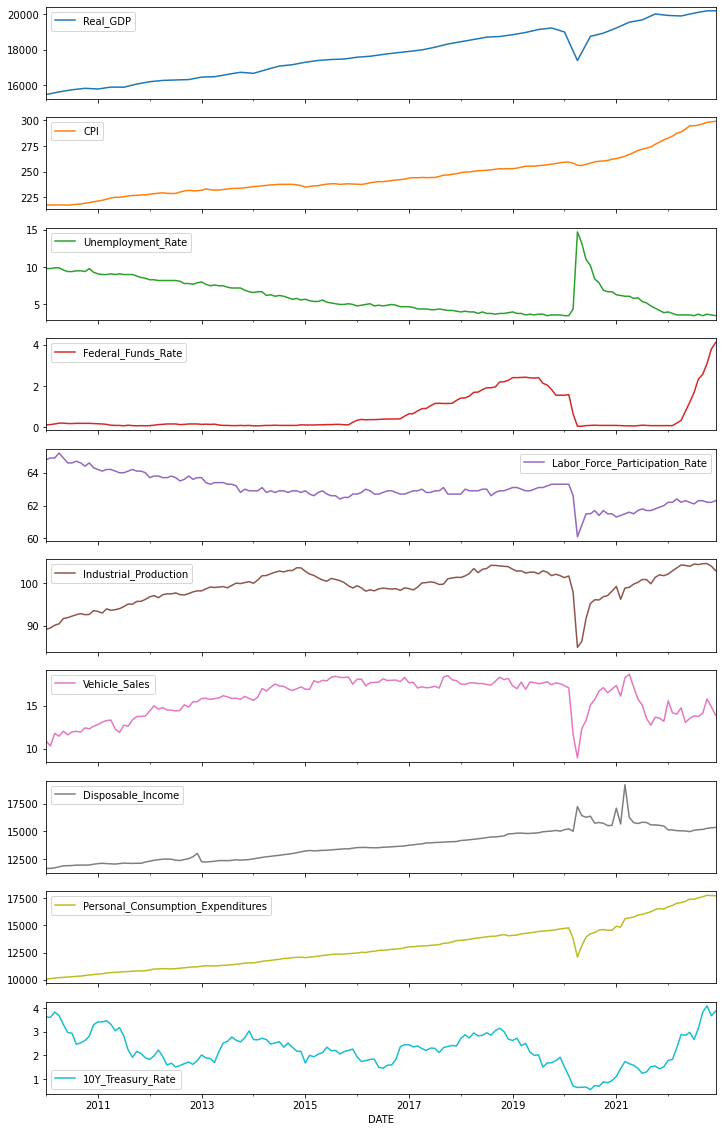

In [6]:
import matplotlib.pyplot as plt

# Create line plots for each time series in fred_data
fred_data.plot(y=['Real_GDP', 'CPI', 'Unemployment_Rate', 'Federal_Funds_Rate', 
                   'Labor_Force_Participation_Rate', 'Industrial_Production', 'Vehicle_Sales', 
                   'Disposable_Income', 'Personal_Consumption_Expenditures', '10Y_Treasury_Rate'],
                subplots=True, figsize=(12,20))

# Display the plots
plt.show()



In [7]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize each series in fred_data
fred_data_scaled = pd.DataFrame(scaler.fit_transform(fred_data), columns=fred_data.columns)

# Display the first few rows of the standardized data
print(fred_data_scaled.head())


   Real_GDP       CPI  Unemployment_Rate  Federal_Funds_Rate  \
0 -1.661221 -1.432244           1.648484           -0.615660   
1 -1.624934 -1.442768           1.648484           -0.592263   
2 -1.588648 -1.439107           1.693053           -0.557169   
3 -1.552362 -1.436565           1.693053           -0.510375   
4 -1.523090 -1.442310           1.559346           -0.510375   

   Labor_Force_Participation_Rate  Industrial_Production  Vehicle_Sales  \
0                        2.095690              -2.580118      -2.269470   
1                        2.210160              -2.498748      -2.536812   
2                        2.210160              -2.334615      -1.862906   
3                        2.553572              -2.249684      -2.009991   
4                        2.210160              -1.929908      -1.743573   

   Disposable_Income  Personal_Consumption_Expenditures  10Y_Treasury_Rate  \
0          -1.492428                          -1.448227           1.904662   
1       

In [8]:
fred_data_scaled.index = fred_data.index

In [9]:
fred_data_scaled.to_csv('data/fred_data_scaled.csv')

In [10]:
import pmdarima as pm
import pandas as pd

# Create a dictionary to store the ARIMA models
models = {}

# Train a seasonal ARIMA model for each series in fred_data_scaled
for col in fred_data_scaled.columns:
    print('Training model for', col)
    model = pm.auto_arima(fred_data_scaled[col], seasonal=True, m=12, 
                          suppress_warnings=True, error_action='ignore')
    models[col] = model
    
    print('Best model:', model.order, model.seasonal_order)
    print(model.summary())


Training model for Real_GDP
Best model: (4, 1, 2) (0, 0, 0, 12)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  156
Model:               SARIMAX(4, 1, 2)   Log Likelihood                 267.166
Date:                Mon, 06 Mar 2023   AIC                           -518.332
Time:                        23:08:47   BIC                           -493.984
Sample:                    01-31-2010   HQIC                          -508.442
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0311      0.028      1.129      0.259      -0.023       0.085
ar.L1         -0.0417      0.453     -0.092      0.927      -0.930 

Best model: (0, 1, 3) (0, 0, 0, 12)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  156
Model:               SARIMAX(0, 1, 3)   Log Likelihood                 -46.587
Date:                Mon, 06 Mar 2023   AIC                            101.174
Time:                        23:09:11   BIC                            113.348
Sample:                    01-31-2010   HQIC                           106.119
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2242      0.038      5.917      0.000       0.150       0.298
ma.L2         -0.2303      0.068     -3.401      0.001      -0.363      -0.098
ma.L3         -0

Best model: (4, 1, 1) (2, 0, 1, 12)
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  156
Model:             SARIMAX(4, 1, 1)x(2, 0, 1, 12)   Log Likelihood                -173.804
Date:                            Mon, 06 Mar 2023   AIC                            367.609
Time:                                    23:10:07   BIC                            398.043
Sample:                                01-31-2010   HQIC                           379.970
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.049e-05      0.000      0.255      0.799      -0.001       0.001

In [11]:
import pickle

# assume `models` folder exists
for col in fred_data_scaled.columns:
    with open(f"models/{col}.pickle", "wb") as f:
        pickle.dump(models[col], f)


In [12]:
import pickle

# assume `models` folder exists
models = {}
for col in fred_data_scaled.columns:
    with open(f"models/{col}.pickle", "rb") as f:
        models[col] = pickle.load(f)


In [13]:
import pandas as pd
import numpy as np
import pmdarima as pm
import pickle

# Load the saved models
models = {}
for col in fred_data_scaled.columns:
    with open(f"models/{col}.pickle", "rb") as f:
        models[col] = pickle.load(f)

# Make predictions
preds = pd.DataFrame()
for col in fred_data_scaled.columns:
    model = models[col]
    pred, _ = model.predict(n_periods=24, return_conf_int=True)
    preds[col] = pred

# Save the predictions to a non-indexed CSV file
preds.to_csv("data/predictions.csv", index=False)


In [28]:
# Concatenate preds and fred_data_scaled
concatenated_df = pd.concat([fred_scaled_data, preds], ignore_index=False)

# Save concatenated dataframe to CSV
concat_data.to_csv('data/fred_data_scaled_with_preds.csv', index=True)

In [29]:
concat_data

,Real_GDP,CPI,Unemployment_Rate,Federal_Funds_Rate,Labor_Force_Participation_Rate,Industrial_Production,Vehicle_Sales,Disposable_Income,Personal_Consumption_Expenditures,10Y_Treasury_Rate,CPALTT01USM657N
2010-01-31,-1.661221,-1.432244,1.648484,-0.615660,2.095690,-2.580118,-2.269470,-1.492428,-1.448227,1.904662,0.391610
2010-02-28,-1.624934,-1.442768,1.648484,-0.592263,2.210160,-2.498748,-2.536812,-1.484681,-1.429918,1.877380,-0.513510
2010-03-31,-1.588648,-1.439107,1.693053,-0.557169,2.210160,-2.334615,-1.862906,-1.451933,-1.399190,2.191122,0.588392
2010-04-30,-1.552362,-1.436565,1.693053,-0.510375,2.553572,-2.249684,-2.009991,-1.383127,-1.386281,1.986508,-0.088505
2010-05-31,-1.523090,-1.442310,1.559346,-0.510375,2.210160,-1.929908,-1.743573,-1.321082,-1.372292,1.468152,-0.363243
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,2.233299,3.950247,-1.159367,3.620344,-0.813383,1.051671,-0.762689,1.554519,2.823684,0.486089,0.497042
2024-09-30,2.256240,4.012759,-1.159367,3.716351,-0.813448,1.051671,-0.762689,1.571695,2.848085,0.318185,0.634072
2024-10-31,2.279180,4.075270,-1.159367,3.839156,-0.813398,1.051671,-0.762689,1.588894,2.872487,0.152454,0.628373
2024-11-30,2.302115,4.137781,-1.159367,3.978121,-0.813436,1.051671,-0.762689,1.606101,2.896888,-0.009843,0.118108
